In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas.plotting import register_matplotlib_converters #Register pandas formatters and converters with matplotlib.
from pylab import rcParams # for customizing matplotlib graphs.
sns.set_style("whitegrid") # This one is very important to keep overall plot background as white.

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('train.csv')
data.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


In [4]:
## Droping  row_id column-- which doesnt seem to have much use.
data.drop('row_id', axis=1, inplace=True)

## Creating individual columns for time column(1991-04-01 03:20:00 --- year-month-day  Hours:minutes:seconds)
data['year'] = data['time'].apply(lambda row: row[:4])
data['month'] = data['time'].apply(lambda row: row.split('-')[1][:2] )
data['date'] = data['time'].apply(lambda row: row.split('-')[2][:2])
data['hour'] = data['time'].apply(lambda row: row.split(':')[0][-2:])
data['minute'] = data['time'].apply(lambda row: row.split(':')[1][-2:])
data['c_date'] = data['time'].apply(lambda row: row.split(' ')[0])

## Chainging dataframe dtypes
data = data.astype({'year':'int64','month':'int64', 'date':'int64','minute':'int64',
                    'x':'str','y':'str', 'direction':'str', 'hour':'int64' })

## Creating new _column by combining x,y,& direction.
data['road_coord']= data['x']+data['y']+data['direction']

## Creating new column is_weekday
dt_list = []
for i,j in enumerate(data['c_date']):
    day_type = datetime.date(data['year'].iloc[i],data['month'].iloc[i],data['date'].iloc[i])
    dy = day_type.weekday()
    dt_list.append(dy)
data['week_num'] = dt_list

## Categorizing is_weekday column 0-Weekday, 1-Weekend
data['is_weekday'] = pd.cut(data['week_num'], bins=[-1,4,6], labels = [0, 1])

## Categorizing new column based on day timings
data['m_a_e_n'] = pd.cut(data['hour'], bins=[4,11,16,21], labels = [0, 1,2])
data = data.astype({'m_a_e_n':'float64'})
data['m_a_e_n'].fillna(3, inplace=True)
data = data.astype({'m_a_e_n':'int64'})

## Encoding the highway code
le = LabelEncoder()
data['highway_code']= le.fit_transform(data['road_coord'])



In [5]:
data = data.astype({'is_weekday':'int64', 'highway_code':'int64', 'week_num':'int64'})
data.drop(['x','y','c_date'], axis=1,inplace=True)
data.head(10)

,time,direction,congestion,year,month,date,hour,minute,road_coord,week_num,is_weekday,m_a_e_n,highway_code
0,1991-04-01 00:00:00,EB,70,1991,4,1,0,0,00EB,0,0,3,0
1,1991-04-01 00:00:00,NB,49,1991,4,1,0,0,00NB,0,0,3,1
2,1991-04-01 00:00:00,SB,24,1991,4,1,0,0,00SB,0,0,3,2
3,1991-04-01 00:00:00,EB,18,1991,4,1,0,0,01EB,0,0,3,3
4,1991-04-01 00:00:00,NB,60,1991,4,1,0,0,01NB,0,0,3,4
5,1991-04-01 00:00:00,SB,58,1991,4,1,0,0,01SB,0,0,3,5
6,1991-04-01 00:00:00,WB,26,1991,4,1,0,0,01WB,0,0,3,6
7,1991-04-01 00:00:00,EB,31,1991,4,1,0,0,02EB,0,0,3,7
8,1991-04-01 00:00:00,NB,49,1991,4,1,0,0,02NB,0,0,3,8
9,1991-04-01 00:00:00,SB,46,1991,4,1,0,0,02SB,0,0,3,9


<AxesSubplot:>

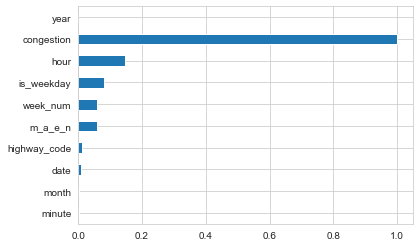

In [6]:
data.corr()['congestion'].abs().sort_values().plot(kind = 'barh')

In [7]:
data.to_csv('fe_modified.csv', index=False)
data.head(10)

,time,direction,congestion,year,month,date,hour,minute,road_coord,week_num,is_weekday,m_a_e_n,highway_code
0,1991-04-01 00:00:00,EB,70,1991,4,1,0,0,00EB,0,0,3,0
1,1991-04-01 00:00:00,NB,49,1991,4,1,0,0,00NB,0,0,3,1
2,1991-04-01 00:00:00,SB,24,1991,4,1,0,0,00SB,0,0,3,2
3,1991-04-01 00:00:00,EB,18,1991,4,1,0,0,01EB,0,0,3,3
4,1991-04-01 00:00:00,NB,60,1991,4,1,0,0,01NB,0,0,3,4
5,1991-04-01 00:00:00,SB,58,1991,4,1,0,0,01SB,0,0,3,5
6,1991-04-01 00:00:00,WB,26,1991,4,1,0,0,01WB,0,0,3,6
7,1991-04-01 00:00:00,EB,31,1991,4,1,0,0,02EB,0,0,3,7
8,1991-04-01 00:00:00,NB,49,1991,4,1,0,0,02NB,0,0,3,8
9,1991-04-01 00:00:00,SB,46,1991,4,1,0,0,02SB,0,0,3,9


In [8]:
data1 =data.groupby(['month'], as_index=False)['congestion'].mean()
data1

,month,congestion
0,4,48.007206
1,5,47.688178
2,6,47.520815
3,7,47.802174
4,8,48.055447
5,9,47.816851


In [9]:
# medians = pd.DataFrame(data.groupby(['highway_code','is_weekday','hour','minute'], as_index=False)['congestion'].median())
# medians['median'] = medians['congestion']
# medians.head(15)

In [10]:
# data['time'] = pd.to_datetime(data['time'], format="%Y-%m-%d %H:%M:%S")
# data.head()

In [11]:
# for delta in range(1,8):
#     day = data.copy()
#     day['time'] = day['time'] + pd.Timedelta(delta, "d")
#     name = f'lag_{delta}'
#     day = day.rename(columns={'congestion':name})[['time', 'highway_code', name]]
    
#     # df_train = df_train.merge(day, on=['time', 'road'], how='left')
#     # df_test = df_test.merge(day, on=['time', 'road'], how='left')

# day

In [12]:
df2 = data.groupby(['is_weekday'], as_index=False)['congestion'].mean()

In [13]:
df2

,is_weekday,congestion
0,0,48.677888
1,1,45.647358


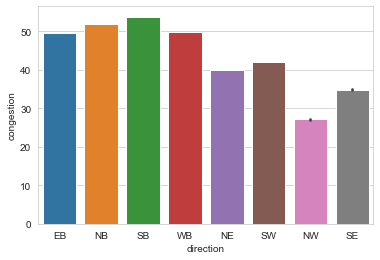

In [14]:
sns.barplot(x='direction',y='congestion', data=data)
plt.show()